Retention – один из самых важных показателей в компании. Ваша задача – написать функцию, которая будет считать retention игроков (по дням от даты регистрации игрока).

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import scipy
import plotly.express as px
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd,MultiComparison
import datetime

In [3]:
reg = pd.read_csv('~/shared/problem1-reg_data.csv', sep = ';') # Считываем данные

In [4]:
auth = pd.read_csv('~/shared/problem1-auth_data.csv', sep = ';') # Считываем данные

In [6]:
reg['reg_ts'] = pd.to_datetime(reg['reg_ts'], unit = 's') # Изменяем тип данных

In [7]:
auth['auth_ts'] = pd.to_datetime(auth['auth_ts'], unit = 's') # Изменяем тип данных

In [9]:
all_df = auth.merge(reg, on='uid') # Объединяем два датафрейма

In [11]:
all_df = all_df[['uid', 'reg_ts', 'auth_ts']] # Меняем местами

In [12]:
all_df = all_df.rename(columns={'uid' : 'id', 'reg_ts' : 'reg_day', 'auth_ts' : 'auth_day'}) # Переименовываем колонки

In [14]:
all_df['reg_day'] = all_df['reg_day'].dt.strftime('%m/%d/%Y') # Убираем время из даты

In [15]:
all_df['reg_day'] = pd.to_datetime(all_df['reg_day']) # Возвращаем необходимый тип данных

In [16]:
all_df['auth_day']= all_df['auth_day'].dt.strftime('%m/%d/%Y') # Убираем время из даты

In [17]:
all_df['auth_day'] = pd.to_datetime(all_df['auth_day']) # Возвращаем необходимый тип данных

In [19]:
all_df = all_df.query('"2020-09-01" <= reg_day and reg_day <= "2020-09-23"') # Выбираем диапазон для расчета метрики

In [61]:
all_df['days_distance'] = (all_df['auth_day'] - all_df['reg_day']).dt.days + 1 
# Считаем кол-во дней между регистрацией и заходом в игру

In [62]:
all_df.head()

,id,reg_day,auth_day,days_distance
9545203,1070035,2020-09-01,2020-09-01,1
9545204,1070035,2020-09-01,2020-09-02,2
9545205,1070035,2020-09-01,2020-09-09,9
9545206,1070035,2020-09-01,2020-09-10,10
9545207,1070035,2020-09-01,2020-09-14,14


In [64]:
ret = all_df.groupby(['reg_day', 'days_distance'])
cohort = ret['id'].size()
cohort = cohort.reset_index()
# Создаем сводную таблицу

In [65]:
cohort_counts = cohort.pivot(index='reg_day', columns='days_distance', values='id')

In [66]:
cohort_counts.head()

days_distance,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
reg_day,,,,,,,,,,,,,,,,,,,,,
2020-09-01,1586.0,32.0,65.0,67.0,73.0,102.0,89.0,102.0,65.0,86.0,...,87.0,68.0,70.0,69.0,80.0,66.0,69.0,57.0,69.0,25.0
2020-09-02,1588.0,40.0,62.0,74.0,90.0,99.0,113.0,100.0,77.0,65.0,...,69.0,79.0,84.0,66.0,77.0,62.0,59.0,74.0,42.0,NaN
2020-09-03,1591.0,37.0,86.0,75.0,104.0,111.0,136.0,101.0,87.0,100.0,...,95.0,87.0,85.0,70.0,77.0,74.0,87.0,38.0,NaN,NaN
2020-09-04,1593.0,32.0,58.0,58.0,82.0,102.0,116.0,79.0,85.0,69.0,...,89.0,70.0,72.0,72.0,68.0,76.0,42.0,NaN,NaN,NaN
2020-09-05,1596.0,44.0,63.0,74.0,87.0,94.0,119.0,78.0,81.0,87.0,...,86.0,72.0,82.0,71.0,76.0,40.0,NaN,NaN,NaN,NaN


In [67]:
base = cohort_counts[1]

In [68]:
retention = cohort_counts.divide(base, axis=0).round(3)

In [74]:
retention

days_distance,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
reg_day,,,,,,,,,,,,,,,,,,,,,
2020-09-01,1.0,0.020,0.041,0.042,0.046,0.064,0.056,0.064,0.041,0.054,...,0.055,0.043,0.044,0.044,0.050,0.042,0.044,0.036,0.044,0.016
2020-09-02,1.0,0.025,0.039,0.047,0.057,0.062,0.071,0.063,0.048,0.041,...,0.043,0.050,0.053,0.042,0.048,0.039,0.037,0.047,0.026,NaN
2020-09-03,1.0,0.023,0.054,0.047,0.065,0.070,0.085,0.063,0.055,0.063,...,0.060,0.055,0.053,0.044,0.048,0.047,0.055,0.024,NaN,NaN
2020-09-04,1.0,0.020,0.036,0.036,0.051,0.064,0.073,0.050,0.053,0.043,...,0.056,0.044,0.045,0.045,0.043,0.048,0.026,NaN,NaN,NaN
2020-09-05,1.0,0.028,0.039,0.046,0.055,0.059,0.075,0.049,0.051,0.055,...,0.054,0.045,0.051,0.044,0.048,0.025,NaN,NaN,NaN,NaN
2020-09-06,1.0,0.031,0.043,0.054,0.056,0.059,0.068,0.061,0.058,0.055,...,0.052,0.055,0.046,0.048,0.026,NaN,NaN,NaN,NaN,NaN
2020-09-07,1.0,0.029,0.042,0.054,0.051,0.064,0.073,0.052,0.041,0.056,...,0.051,0.042,0.051,0.034,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-08,1.0,0.017,0.039,0.039,0.049,0.076,0.075,0.066,0.052,0.052,...,0.052,0.047,0.031,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-09,1.0,0.017,0.032,0.047,0.057,0.067,0.057,0.059,0.044,0.050,...,0.049,0.024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


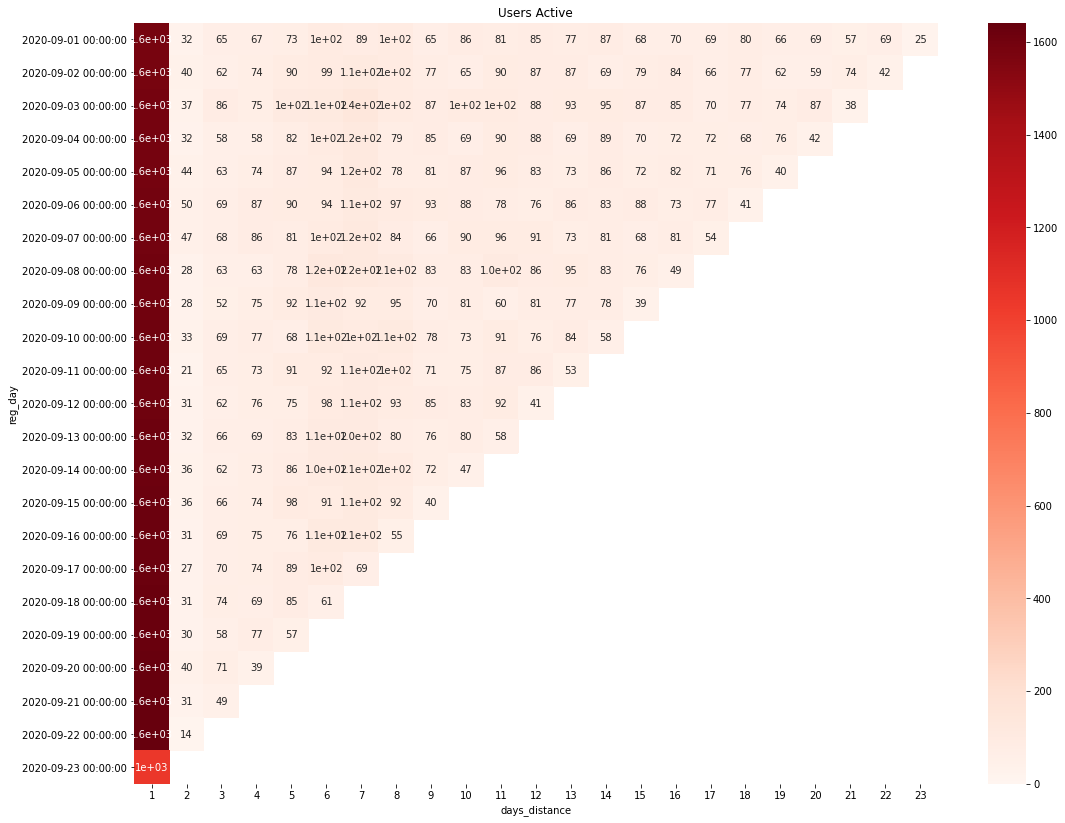

In [75]:
# Визуализируем результат
# В абсолютных значениях
plt.figure(figsize=(18,14))
plt.title('Users Active')
ax = sns.heatmap(data=cohort_counts, annot=True, vmin=0.0,cmap='Reds')
ax.set_yticklabels(cohort_counts.index)
fig=ax.get_figure()

plt.show()

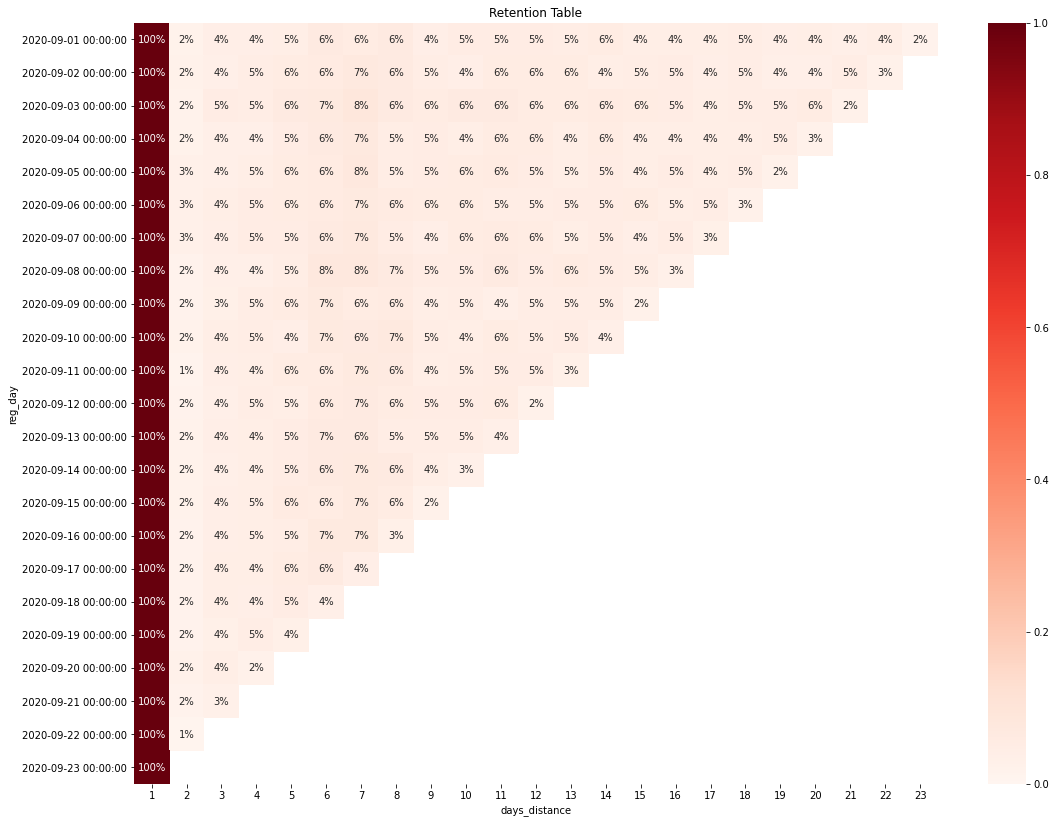

In [76]:
# В процентах
plt.figure(figsize=(18,14))
plt.title('Retention Table')
ax = sns.heatmap(data=retention, annot=True, fmt='.0%', vmin=0.0, vmax=1,cmap='Reds')
ax.set_yticklabels(retention.index)
fig=ax.get_figure()

plt.show()